# Table of Content:
 - Import Libraries & Load the data
 - Exploratory Data Analysis (EDA)
 - Data Preprocessing
 - Feature Engineering & Selection
 - Model Development
 - Model Evaluation
 - Try Nerual Network

## Import Libraries & Load the data

In [ ]:
pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, SVC
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

warnings.simplefilter('ignore')  # To suppress warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon/OSU HackAI/triple-c/data/HousingDataset.csv')
df = df.iloc[:, 1:]
original_df = df.copy()
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6090000,6615,4,2,2,yes,yes,no,yes,no,1,no,semi-furnished
1,5530000,6100,3,2,1,yes,no,yes,no,no,2,yes,furnished
2,3500000,4600,4,1,2,yes,no,no,no,no,0,no,semi-furnished
3,6090000,6600,3,1,1,yes,yes,yes,no,no,2,yes,semi-furnished
4,7962500,6000,3,1,4,yes,yes,no,no,yes,2,no,unfurnished


In [ ]:
# Check the unique values in each columns
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f"Number of unique values in {column}: {num_unique_values}")

Number of unique values in price: 168
Number of unique values in area: 203
Number of unique values in bedrooms: 6
Number of unique values in bathrooms: 3
Number of unique values in stories: 4
Number of unique values in mainroad: 2
Number of unique values in guestroom: 2
Number of unique values in basement: 2
Number of unique values in hotwaterheating: 2
Number of unique values in airconditioning: 2
Number of unique values in parking: 4
Number of unique values in prefarea: 2
Number of unique values in furnishingstatus: 3


In [ ]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for column in binary_columns:
    df[column] = df[column].apply(lambda x: 1 if x == 'yes' else 0)

furnishing_status_mapping = {
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
}

# Apply the mapping to the furnishingstatus column
df['furnishingstatus'] = df['furnishingstatus'].replace(furnishing_status_mapping)

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6090000,6615,4,2,2,1,1,0,1,0,1,0,1
1,5530000,6100,3,2,1,1,0,1,0,0,2,1,2
2,3500000,4600,4,1,2,1,0,0,0,0,0,0,1
3,6090000,6600,3,1,1,1,1,1,0,0,2,1,1
4,7962500,6000,3,1,4,1,1,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,3675000,3600,2,1,1,1,0,0,0,0,0,0,2
323,4060000,4320,3,1,2,1,0,0,0,0,2,1,2
324,2275000,1836,2,1,1,0,0,1,0,0,0,0,1
325,5943000,15600,3,1,1,1,0,0,0,1,2,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             327 non-null    int64
 1   area              327 non-null    int64
 2   bedrooms          327 non-null    int64
 3   bathrooms         327 non-null    int64
 4   stories           327 non-null    int64
 5   mainroad          327 non-null    int64
 6   guestroom         327 non-null    int64
 7   basement          327 non-null    int64
 8   hotwaterheating   327 non-null    int64
 9   airconditioning   327 non-null    int64
 10  parking           327 non-null    int64
 11  prefarea          327 non-null    int64
 12  furnishingstatus  327 non-null    int64
dtypes: int64(13)
memory usage: 33.3 KB


## EDA

In [ ]:
# Summary statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,3.270000e+02,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,4.778645e+06,4981.730887,2.996942,1.302752,1.850153,0.856269,0.171254,0.327217,0.067278,0.305810,0.651376,0.192661,0.938838
std,1.948108e+06,1946.061026,0.765428,0.498549,0.892466,0.351354,0.377308,0.469916,0.250887,0.461456,0.847691,0.394993,0.764987
min,1.750000e+06,1836.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.395000e+06,3577.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.319000e+06,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.806500e+06,6100.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,15600.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


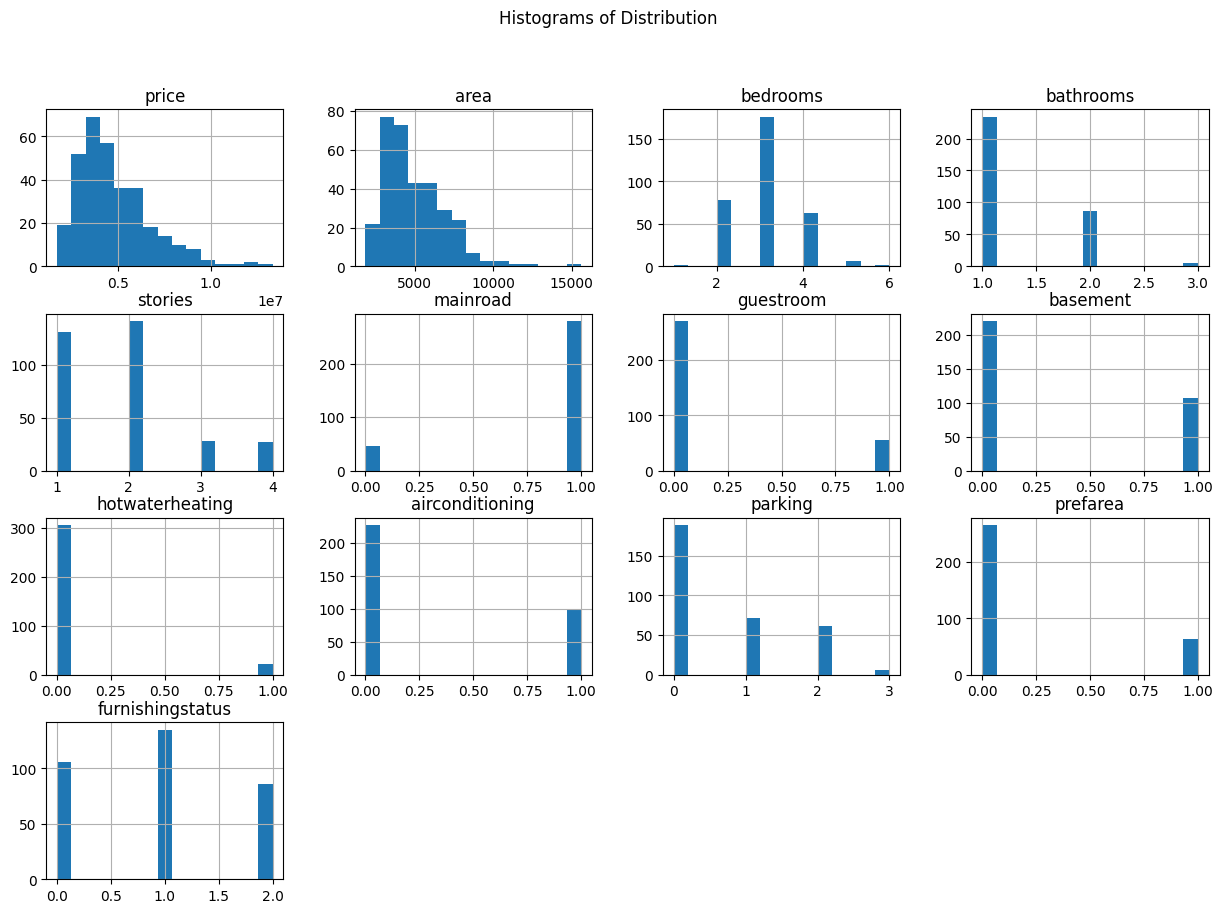

In [ ]:
# Histograms of Distribution
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Distribution")
plt.show()

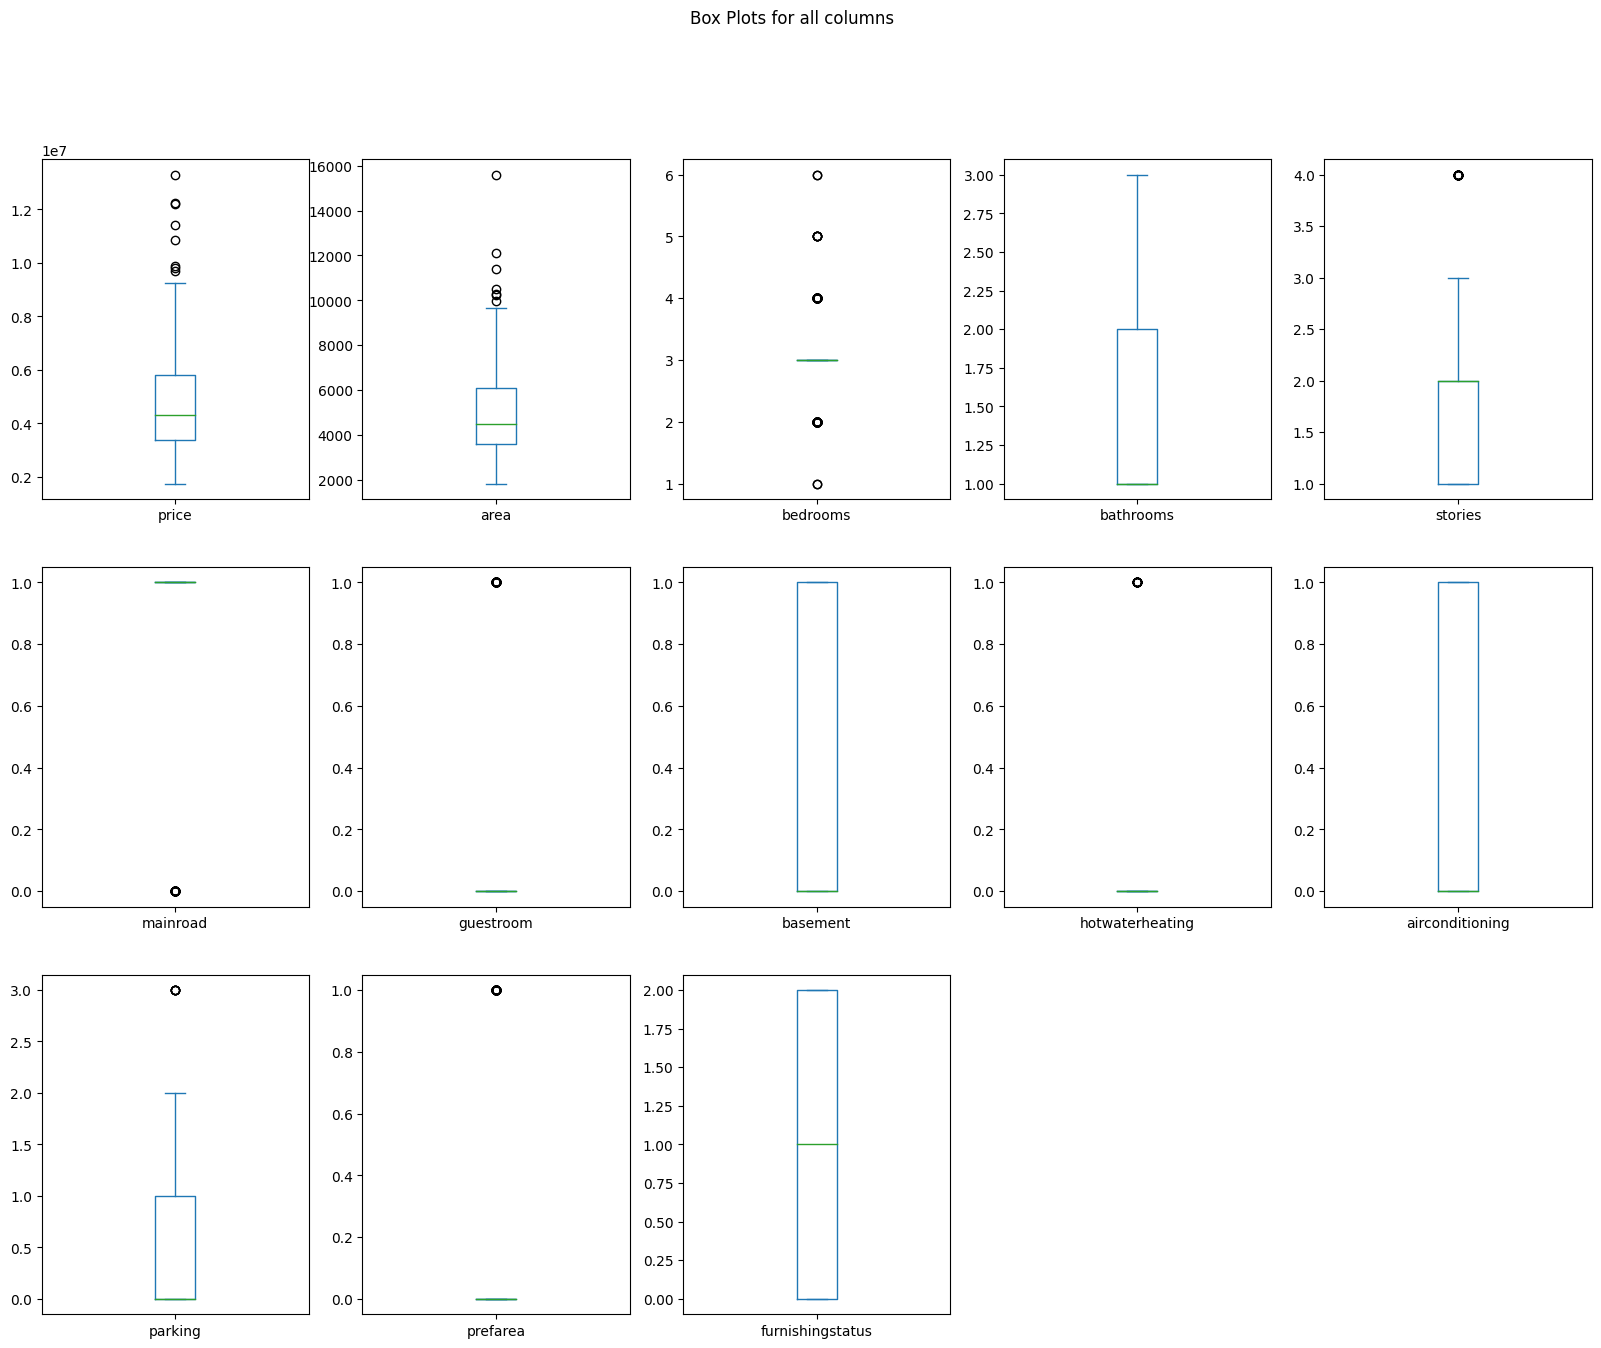

In [ ]:
# Box plots for each feature
df.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False, figsize=(20,15))
plt.suptitle("Box Plots for all columns")
plt.show()

The data is somewhat normally distributed. And there are many outliers present in the dataset. We shall fix these outliers..

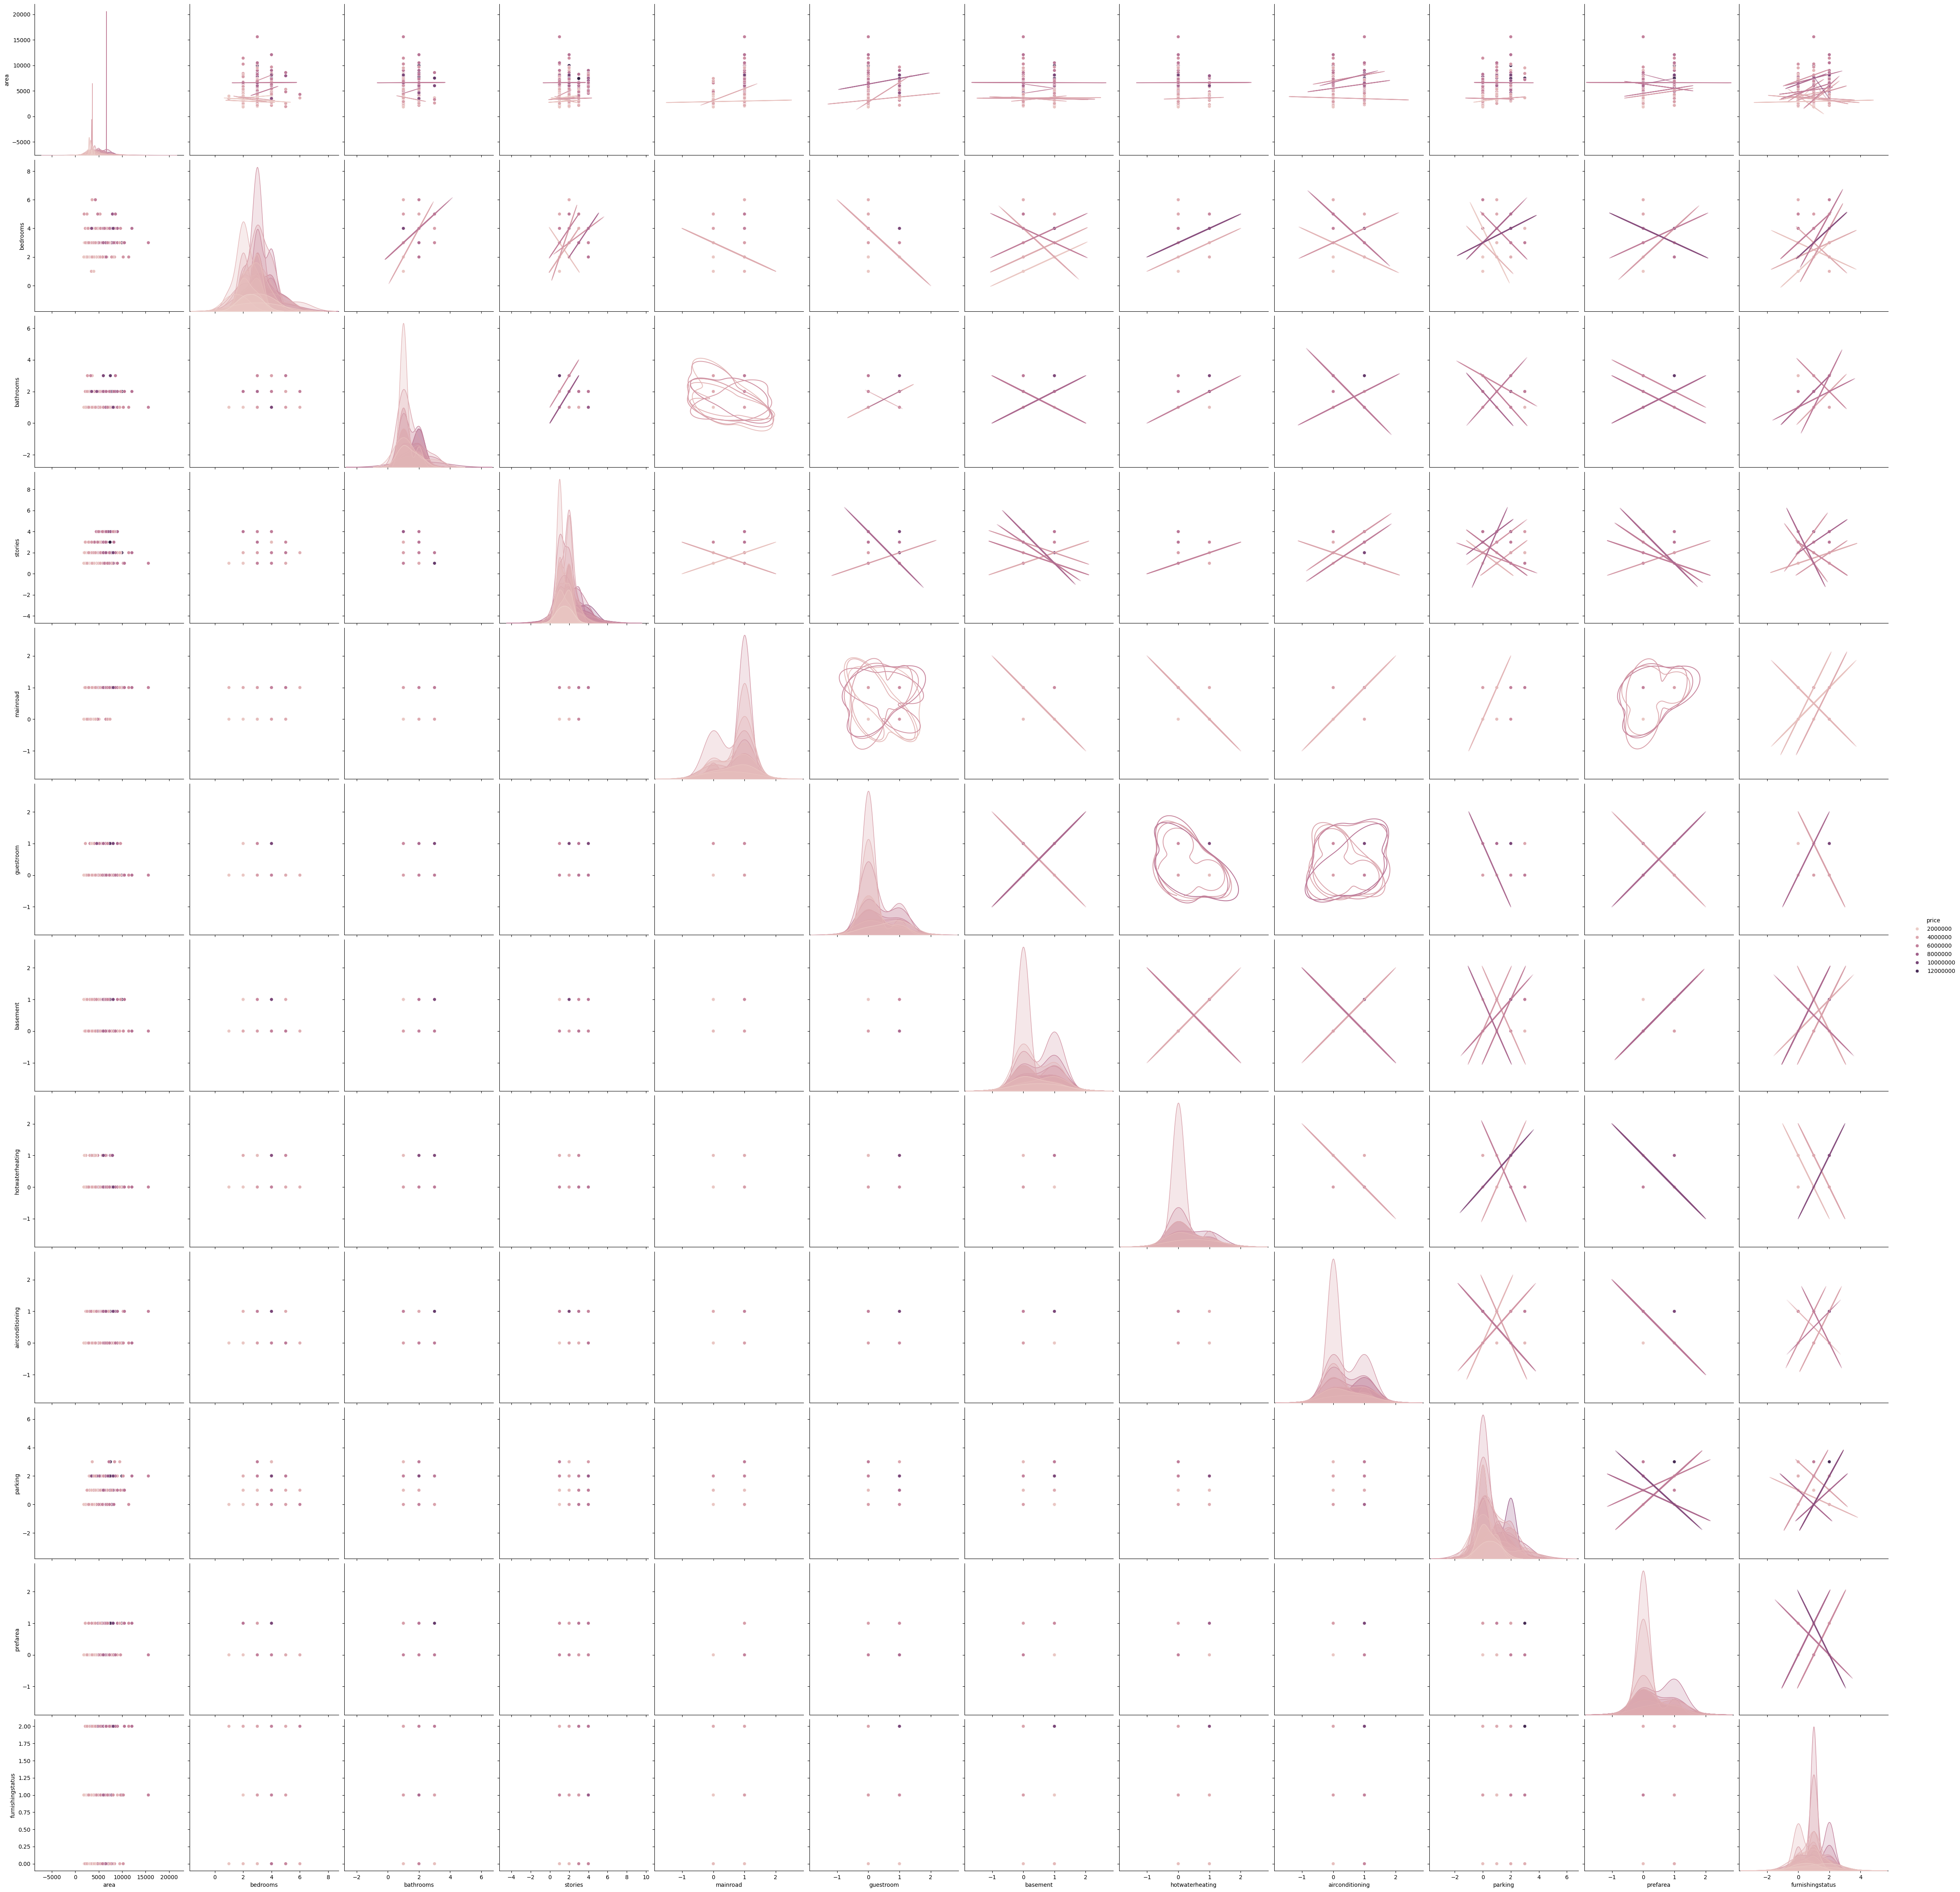

In [ ]:
g = sns.pairplot(df, hue='price', height=4)
g.map_upper(sns.kdeplot, levels=1, color=".2")
plt.show()

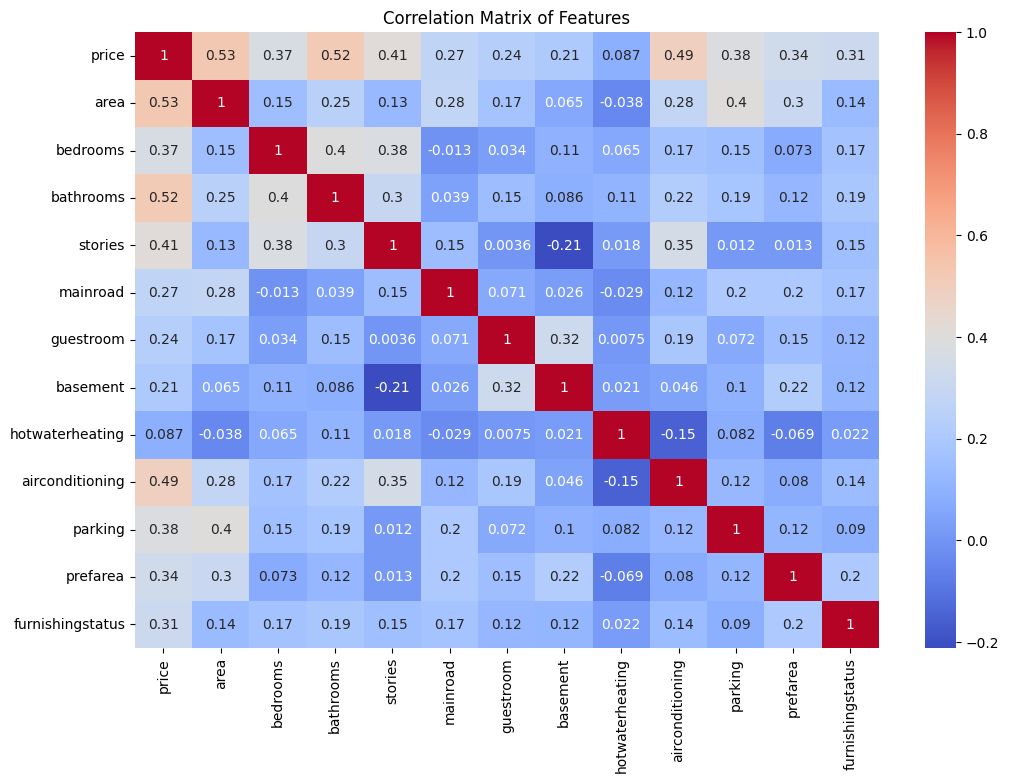

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

Drop hotwaterheating

In [ ]:
target = 'price'
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

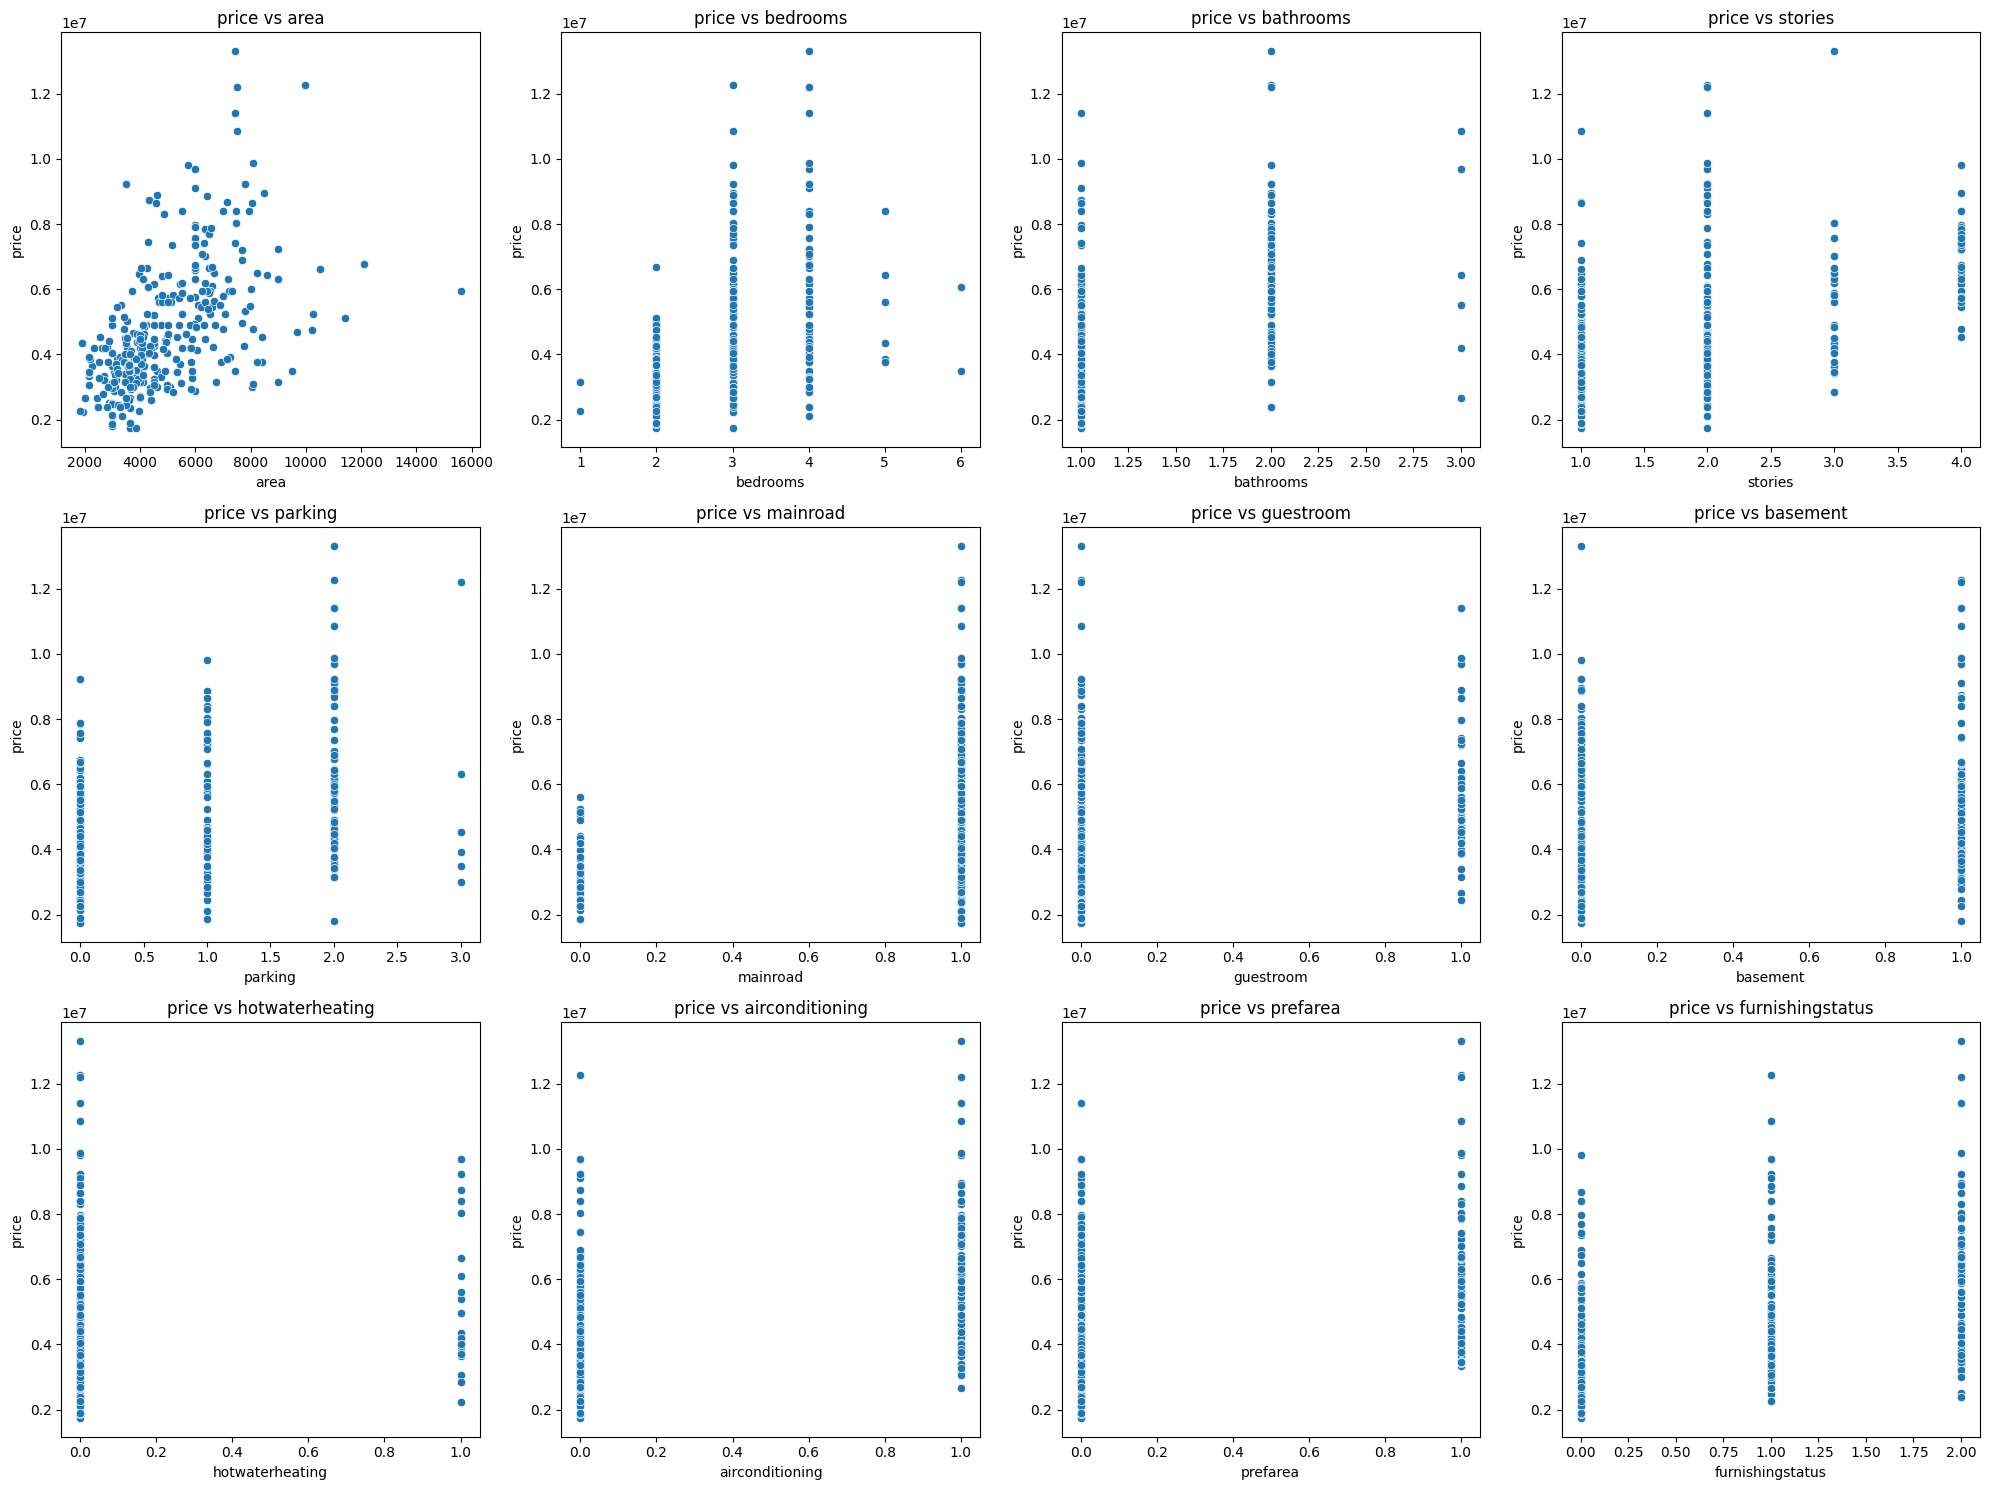

In [ ]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Verify that 'features' does not have more elements than there are plots
features = features[:len(axes)]

# Iterate through each feature and create a scatter plot against 'price'
for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y=target, data=df, ax=axes[i])
    axes[i].set_title(f'{target} vs {feature}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Data Preprocessing


In [ ]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))

The Datset has 1 numerical & 11 categorical features.


In [ ]:
counter = 0
r,c =  df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print(' The dataset doesn\'t have any duplicates')
else:
    print(f'Number of duplicates dropped ---> {r-df1.shape[0]}')

 The dataset doesn't have any duplicates


In [ ]:
#Check for empty elements
nvc = pd.DataFrame(df1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df1.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
price                             0         0.0
area                              0         0.0
bedrooms                          0         0.0
bathrooms                         0         0.0
stories                           0         0.0
mainroad                          0         0.0
guestroom                         0         0.0
basement                          0         0.0
hotwaterheating                   0         0.0
airconditioning                   0         0.0
parking                           0         0.0
prefarea                          0         0.0
furnishingstatus                  0         0.0


In [ ]:
df2 = df1.copy()

for column in df2.columns:
    # Check if the column is numeric since outlier removal is typically applied to numeric data
    if pd.api.types.is_numeric_dtype(df2[column]):
        q1 = df2[column].quantile(0.05)
        q9 = df2[column].quantile(0.95)
        IQR = q9 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q9 + 1.5 * IQR
        df2 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]

df2 = df2.reset_index(drop=True)
display(df2.head())
print('Before removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df2.shape[0]))

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6090000,6615,4,2,2,1,1,0,1,0,1,0,1
1,5530000,6100,3,2,1,1,0,1,0,0,2,1,2
2,3500000,4600,4,1,2,1,0,0,0,0,0,0,1
3,6090000,6600,3,1,1,1,1,1,0,0,2,1,1
4,7962500,6000,3,1,4,1,1,0,0,1,2,0,0


Before removal of outliers, The dataset had 327 samples.
After removal of outliers, The dataset now has 327 samples.


### Feature Engineering & Selection

In [ ]:
df3 = df2.copy()

In [ ]:
#transofrmation
from scipy import stats

#logarithm
df3.drop(df3[df3['price']==0].index, inplace=True)
df3['logprice']=np.log(df3['price'])
df3['logarea']=np.log(df3['area'])
df3

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,logprice,logarea
0,6090000,6615,4,2,2,1,1,0,1,0,1,0,1,15.622159,8.797095
1,5530000,6100,3,2,1,1,0,1,0,0,2,1,2,15.525698,8.716044
2,3500000,4600,4,1,2,1,0,0,0,0,0,0,1,15.068274,8.433812
3,6090000,6600,3,1,1,1,1,1,0,0,2,1,1,15.622159,8.794825
4,7962500,6000,3,1,4,1,1,0,0,1,2,0,0,15.890254,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,3675000,3600,2,1,1,1,0,0,0,0,0,0,2,15.117064,8.188689
323,4060000,4320,3,1,2,1,0,0,0,0,2,1,2,15.216694,8.371011
324,2275000,1836,2,1,1,0,0,1,0,0,0,0,1,14.637491,7.515345
325,5943000,15600,3,1,1,1,0,0,0,1,2,0,1,15.597725,9.655026


(array([ 37., 103.,  78.,  51.,  26.,  16.,  10.,   2.,   1.,   3.]),
 array([ 1750000.,  2905000.,  4060000.,  5215000.,  6370000.,  7525000.,
         8680000.,  9835000., 10990000., 12145000., 13300000.]),
 <BarContainer object of 10 artists>)

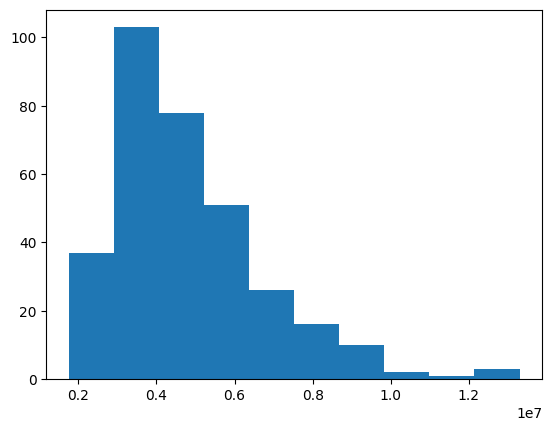

In [ ]:
plt.hist(df3['price'])

(array([ 8., 15., 43., 68., 63., 52., 39., 26.,  9.,  4.]),
 array([14.37512635, 14.57794117, 14.780756  , 14.98357082, 15.18638564,
        15.38920047, 15.59201529, 15.79483012, 15.99764494, 16.20045977,
        16.40327459]),
 <BarContainer object of 10 artists>)

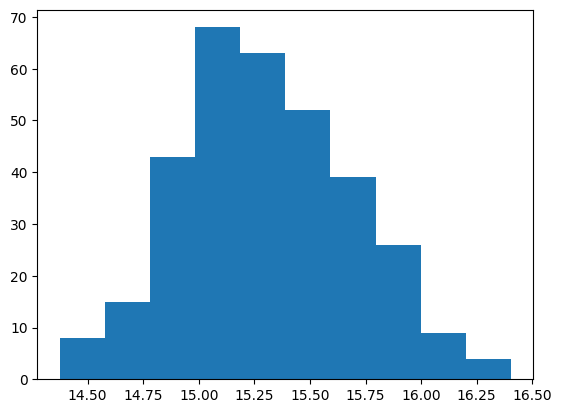

In [ ]:
plt.hist(df3['logprice'])

(array([ 53., 119.,  55.,  60.,  28.,   6.,   4.,   1.,   0.,   1.]),
 array([ 1836. ,  3212.4,  4588.8,  5965.2,  7341.6,  8718. , 10094.4,
        11470.8, 12847.2, 14223.6, 15600. ]),
 <BarContainer object of 10 artists>)

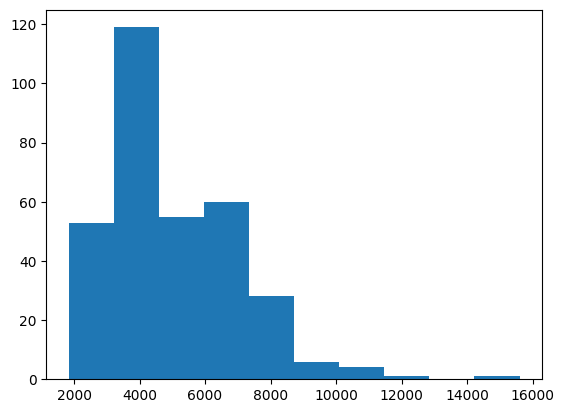

In [ ]:
plt.hist(df3['area'])

(array([10., 14., 47., 83., 51., 65., 39., 12.,  5.,  1.]),
 array([7.51534457, 7.72931273, 7.9432809 , 8.15724906, 8.37121722,
        8.58518538, 8.79915354, 9.01312171, 9.22708987, 9.44105803,
        9.65502619]),
 <BarContainer object of 10 artists>)

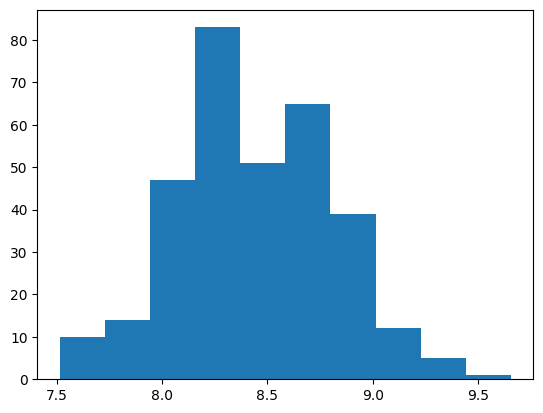

In [ ]:
plt.hist(df3['logarea'])

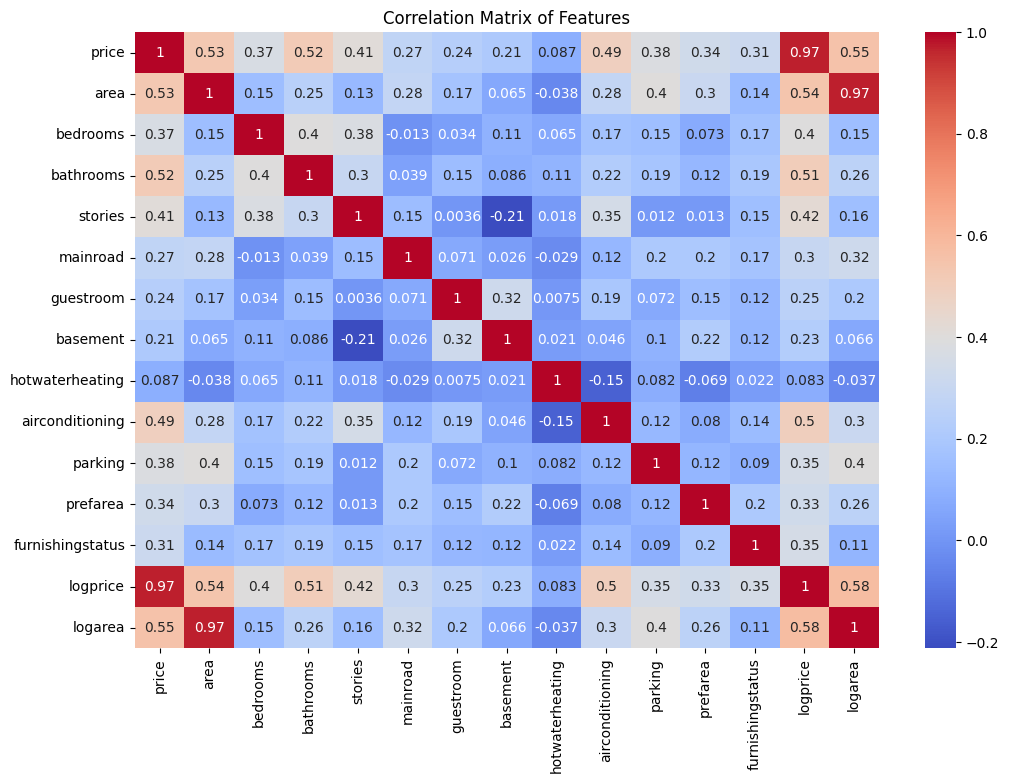

In [ ]:
# Correlation matrix
correlation_matrix = df3.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
target = 'logprice'
features = ['logarea', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'airconditioning', 'prefarea', 'furnishingstatus']

In [ ]:
# Define X and y
X = df3[features]
y = df3[target]
display(X)
display(y)

,logarea,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,airconditioning,prefarea,furnishingstatus
0,8.797095,4,2,2,1,1,1,0,0,0,1
1,8.716044,3,2,1,2,1,0,1,0,1,2
2,8.433812,4,1,2,0,1,0,0,0,0,1
3,8.794825,3,1,1,2,1,1,1,0,1,1
4,8.699515,3,1,4,2,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
322,8.188689,2,1,1,0,1,0,0,0,0,2
323,8.371011,3,1,2,2,1,0,0,0,1,2
324,7.515345,2,1,1,0,0,0,1,0,0,1
325,9.655026,3,1,1,2,1,0,0,1,0,1


0      15.622159
1      15.525698
2      15.068274
3      15.622159
4      15.890254
         ...    
322    15.117064
323    15.216694
324    14.637491
325    15.597725
326    15.297797
Name: logprice, Length: 327, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (228, 11)
X_test.shape: (99, 11)
y_train.shape: (228,)
y_test.shape: (99,)


##Feature Scaling

We will be using a standard scaler in this
scenario.

In [ ]:
# Define the scaler
dt_ss = StandardScaler().fit(X_train)

# Scale the train set
dt_train_SX = dt_ss.transform(X_train)

# Scale the test set
dt_test_SX = dt_ss.transform(X_test)

##Train, Predict & Evaluate Model

In [ ]:
#Let us create first create a table to store the results of various models

# Define a DataFrame to store the evaluation results for regression models
Evaluation_Results = pd.DataFrame(np.zeros((6, 4)), columns=['MAE', 'MSE', 'RMSE', 'R²'])
Evaluation_Results.index = ['Decision Tree (DT)', 'Random Forest (RF)', 'Support Vector Machine (SVM)', 'Gradient Boosting (GB)', 'Extreme Gradient Boosting (XGB)', 'Linear Regression (LR)']


# Display the empty DataFrame
print(Evaluation_Results)

                                 MAE  MSE  RMSE   R²
Decision Tree (DT)               0.0  0.0   0.0  0.0
Random Forest (RF)               0.0  0.0   0.0  0.0
Support Vector Machine (SVM)     0.0  0.0   0.0  0.0
Gradient Boosting (GB)           0.0  0.0   0.0  0.0
Extreme Gradient Boosting (XGB)  0.0  0.0   0.0  0.0
Linear Regression (LR)           0.0  0.0   0.0  0.0


In [ ]:
# Building Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_DTC = DecisionTreeRegressor()
DTC=dt_DTC.fit(dt_train_SX,  y_train)

pred = DTC.predict(dt_test_SX)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

Evaluation_Results.loc['Decision Tree (DT)'] = [mae, mse, rmse, r2]
Evaluation_Results

,MAE,MSE,RMSE,R²
Decision Tree (DT),0.263521,0.12616,0.35519,0.173749
Random Forest (RF),0.000000,0.00000,0.00000,0.000000
Support Vector Machine (SVM),0.000000,0.00000,0.00000,0.000000
Gradient Boosting (GB),0.000000,0.00000,0.00000,0.000000
Extreme Gradient Boosting (XGB),0.000000,0.00000,0.00000,0.000000
Linear Regression (LR),0.000000,0.00000,0.00000,0.000000


In [ ]:
# Building Random-Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()

RF = RF_model.fit( dt_train_SX,  y_train )
pred = RF.predict(dt_test_SX)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

Evaluation_Results.loc['Random Forest (RF)'] = [mae, mse, rmse, r2]
Evaluation_Results

,MAE,MSE,RMSE,R²
Decision Tree (DT),0.263521,0.126160,0.355190,0.173749
Random Forest (RF),0.180307,0.054467,0.233382,0.643283
Support Vector Machine (SVM),0.000000,0.000000,0.000000,0.000000
Gradient Boosting (GB),0.000000,0.000000,0.000000,0.000000
Extreme Gradient Boosting (XGB),0.000000,0.000000,0.000000,0.000000
Linear Regression (LR),0.000000,0.000000,0.000000,0.000000


In [ ]:
# Building Support Vector Machine Regressor
SVM_model = SVR()

SVM = SVM_model.fit(dt_train_SX, y_train)
pred = SVM.predict(dt_test_SX)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

Evaluation_Results.loc['Support Vector Machine (SVM)'] = [mae, mse, rmse, r2]
Evaluation_Results

,MAE,MSE,RMSE,R²
Decision Tree (DT),0.263521,0.126160,0.355190,0.173749
Random Forest (RF),0.180307,0.054467,0.233382,0.643283
Support Vector Machine (SVM),0.168276,0.049700,0.222936,0.674500
Gradient Boosting (GB),0.000000,0.000000,0.000000,0.000000
Extreme Gradient Boosting (XGB),0.000000,0.000000,0.000000,0.000000
Linear Regression (LR),0.000000,0.000000,0.000000,0.000000


In [ ]:
# Building Extreme Gradient Boosting Regressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
XGB_model = XGBRegressor(objective='reg:squarederror')  # For regression tasks

param_dist = {
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}

# Using RandomizedSearchCV with XGBRegressor and a regression scoring metric
RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='neg_mean_squared_error', n_jobs=None, cv=5, random_state=1)

# Fit the model
XGB = RCV.fit(dt_train_SX, y_train).best_estimator_

# Making predictions
pred = XGB.predict(dt_test_SX)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

Evaluation_Results.loc['Extreme Gradient Boosting (XGB)'] = [mae, mse, rmse, r2]
Evaluation_Results

,MAE,MSE,RMSE,R²
Decision Tree (DT),0.263521,0.126160,0.355190,0.173749
Random Forest (RF),0.180307,0.054467,0.233382,0.643283
Support Vector Machine (SVM),0.168276,0.049700,0.222936,0.674500
Gradient Boosting (GB),0.000000,0.000000,0.000000,0.000000
Extreme Gradient Boosting (XGB),0.177977,0.052291,0.228672,0.657535
Linear Regression (LR),0.000000,0.000000,0.000000,0.000000


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

# Fit the model to your training data
lr_model.fit(dt_train_SX, y_train)

# Make predictions on the test set
pred = lr_model.predict(dt_test_SX)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

Evaluation_Results.loc['Linear Regression (LR)'] = [mae, mse, rmse, r2]
Evaluation_Results

,MAE,MSE,RMSE,R²
Decision Tree (DT),0.263521,0.126160,0.355190,0.173749
Random Forest (RF),0.180307,0.054467,0.233382,0.643283
Support Vector Machine (SVM),0.168276,0.049700,0.222936,0.674500
Gradient Boosting (GB),0.000000,0.000000,0.000000,0.000000
Extreme Gradient Boosting (XGB),0.177977,0.052291,0.228672,0.657535
Linear Regression (LR),0.175939,0.049460,0.222396,0.676073


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Adjusting parameters for Gradient Boosting Regressor
GB_model = GradientBoostingRegressor()
param_dist = {
    "n_estimators": [5, 20, 100, 500],
    "max_depth": [1, 3, 5, 7, 9],
    "learning_rate": [0.01, 0.1, 1, 10, 100]
}

# Using RandomizedSearchCV with GradientBoostingRegressor
RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='neg_mean_squared_error', n_jobs=None, cv=5, random_state=1)

# Fit the model
GB = RCV.fit(dt_train_SX, y_train).best_estimator_

pred = GB.predict(dt_test_SX)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

Evaluation_Results.loc['Gradient Boosting (GB)'] = [mae, mse, rmse, r2]
Evaluation_Results

,MAE,MSE,RMSE,R²
Decision Tree (DT),0.263521,0.126160,0.355190,0.173749
Random Forest (RF),0.180307,0.054467,0.233382,0.643283
Support Vector Machine (SVM),0.168276,0.049700,0.222936,0.674500
Gradient Boosting (GB),0.169177,0.047723,0.218456,0.687451
Extreme Gradient Boosting (XGB),0.177977,0.052291,0.228672,0.657535
Linear Regression (LR),0.175939,0.049460,0.222396,0.676073


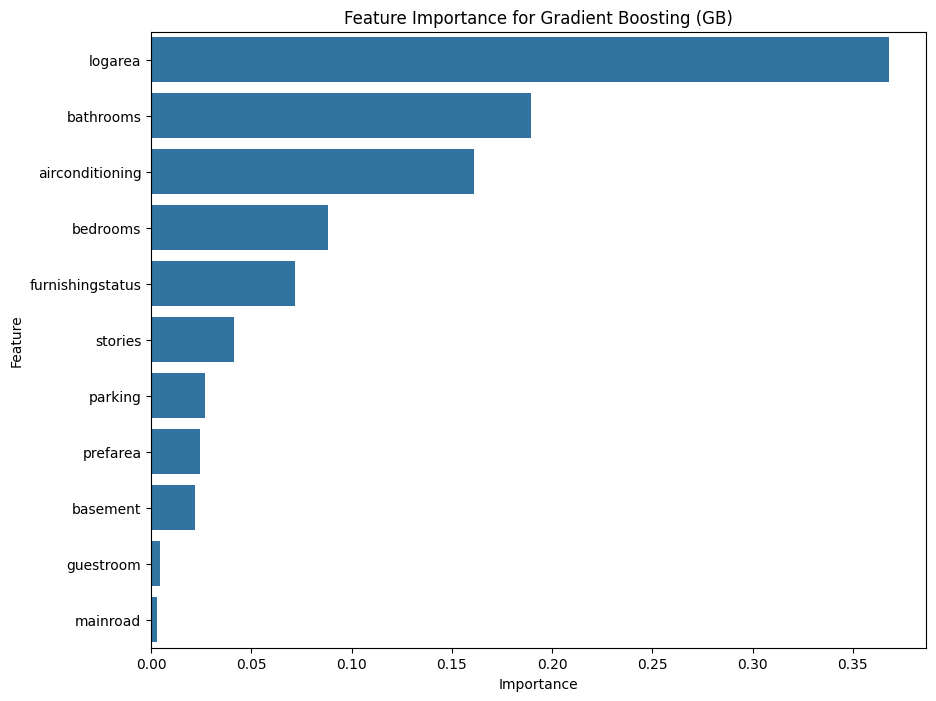

In [ ]:
gb_feature_names = ['logarea', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'airconditioning', 'prefarea', 'furnishingstatus']

# Extract the feature importances from the model
gb_feature_importances = GB.feature_importances_

# Create a DataFrame to hold feature names and their corresponding importances
feature_importance = pd.DataFrame({
    'Feature': gb_feature_names,
    'Importance': gb_feature_importances
})

# Sort the DataFrame by the values of the importances in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting the Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title('Feature Importance for Gradient Boosting (GB)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2) # Diagonal line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs. Predicted Prices - {model_name}')
    plt.show()

In [ ]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot - {model_name}')
    plt.show()

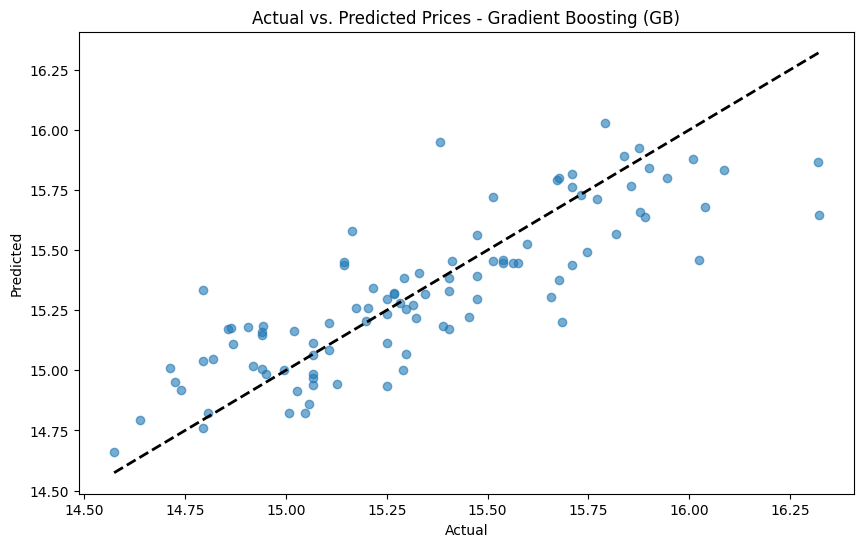

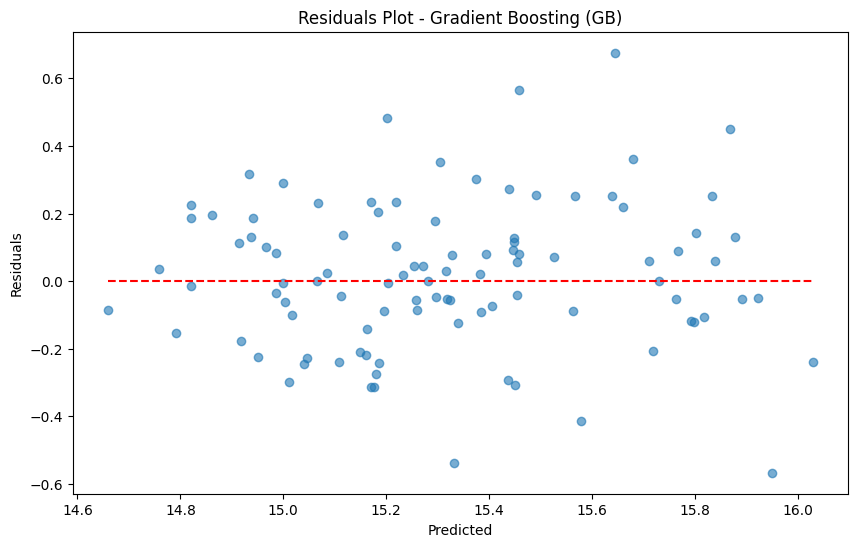

In [ ]:
# plot_actual_vs_predicted
model_name = 'Gradient Boosting (GB)'
plot_actual_vs_predicted(y_test, pred, model_name)
plot_residuals(y_test, pred, model_name)

## Try Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming dt_train_SX and dt_test_SX are your features, and y_train and y_test are your target variables

# It's important to scale your data for neural networks to improve training performance
scaler = StandardScaler()
dt_train_SX_scaled = scaler.fit_transform(dt_train_SX)
dt_test_SX_scaled = scaler.transform(dt_test_SX)

# Define the neural network architecture
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(dt_train_SX_scaled.shape[1],)),
    layers.Dropout(0.1),  # Dropout layer to reduce overfitting
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression (no activation function)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(dt_train_SX_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

# Predicting the Test set results
y_pred_nn = model.predict(dt_test_SX_scaled).flatten()

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network MSE: {mse_nn}")
print(f"Neural Network RMSE: {rmse_nn}")
print(f"Neural Network R^2: {r2_nn}")

Epoch 1/100
6/6 [==============================] - 1s 32ms/step - loss: 216.8673 - mae: 14.7149 - val_loss: 207.9521 - val_mae: 14.4136
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 206.7958 - mae: 14.3641 - val_loss: 197.6972 - val_mae: 14.0509
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 195.9209 - mae: 13.9774 - val_loss: 186.8683 - val_mae: 13.6567
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 183.8966 - mae: 13.5281 - val_loss: 174.9272 - val_mae: 13.2071
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 171.6332 - mae: 13.0595 - val_loss: 161.8764 - val_mae: 12.6956
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 157.6866 - mae: 12.5036 - val_loss: 147.7229 - val_mae: 12.1141
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 141.6444 - mae: 11.8288 - val_loss: 132.1159 - val_mae: 11.4356
Epoch 8/100
6/6 [==============================] - 0s 